In [193]:
import gc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical

import tensorflow.keras.layers as L
from tensorflow.keras import models

random.seed(10)
print(random.random()) 

0.5714025946899135


In [4]:
df = pd.read_excel("default of credit card clients.xls", header=1).set_index("ID")
df = df.rename({"default payment next month": "default"}, axis=1)

In [80]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,marrige_0,marrige_1,marrige_2,marrige_3
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,120000,2,2,2,26,-1,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,90000,2,2,2,34,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50000,2,2,1,37,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,50000,1,2,1,57,-1,0,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,30000,1,2,2,37,4,3,2,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
print(df.columns), print(df.loc[:2])

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'feature_SEX', 'edu_0', 'edu_1', 'edu_2', 'edu_3', 'edu_4', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',
       'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_1', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY

(None, None)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29669 entries, 1 to 30000
Data columns (total 100 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    29669 non-null  int64  
 1   SEX          29669 non-null  int64  
 2   EDUCATION    29669 non-null  int64  
 3   MARRIAGE     29669 non-null  int64  
 4   AGE          29669 non-null  int64  
 5   PAY_0        29669 non-null  int64  
 6   PAY_2        29669 non-null  int64  
 7   PAY_3        29669 non-null  int64  
 8   PAY_4        29669 non-null  int64  
 9   PAY_5        29669 non-null  int64  
 10  PAY_6        29669 non-null  int64  
 11  BILL_AMT1    29669 non-null  int64  
 12  BILL_AMT2    29669 non-null  int64  
 13  BILL_AMT3    29669 non-null  int64  
 14  BILL_AMT4    29669 non-null  int64  
 15  BILL_AMT5    29669 non-null  int64  
 16  BILL_AMT6    29669 non-null  int64  
 17  PAY_AMT1     29669 non-null  int64  
 18  PAY_AMT2     29669 non-null  int64  
 19  PAY

In [83]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
            ..
PAY_6_8      0
marrige_0    0
marrige_1    0
marrige_2    0
marrige_3    0
Length: 100, dtype: int64

In [84]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,marrige_0,marrige_1,marrige_2,marrige_3
count,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,...,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000,29669.000000
mean,167510.993967,1.603357,1.816307,1.552698,35.469952,-0.015437,-0.131855,-0.163875,-0.218882,-0.264620,...,0.006202,0.001652,0.000438,0.000640,0.001550,0.000067,0.001820,0.454380,0.533082,0.010718
std,129869.448745,0.489209,0.712210,0.521832,9.212113,1.124856,1.199835,1.200271,1.172505,1.136342,...,0.078508,0.040606,0.020928,0.025298,0.039346,0.008210,0.042624,0.497923,0.498913,0.102974
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
"""
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

"""

'\nThis research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:\nX1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.\nX2: Gender (1 = male; 2 = female).\nX3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).\nX4: Marital status (1 = married; 2 = single; 3 = others).\nX5: Age (year).\nX6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine m

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


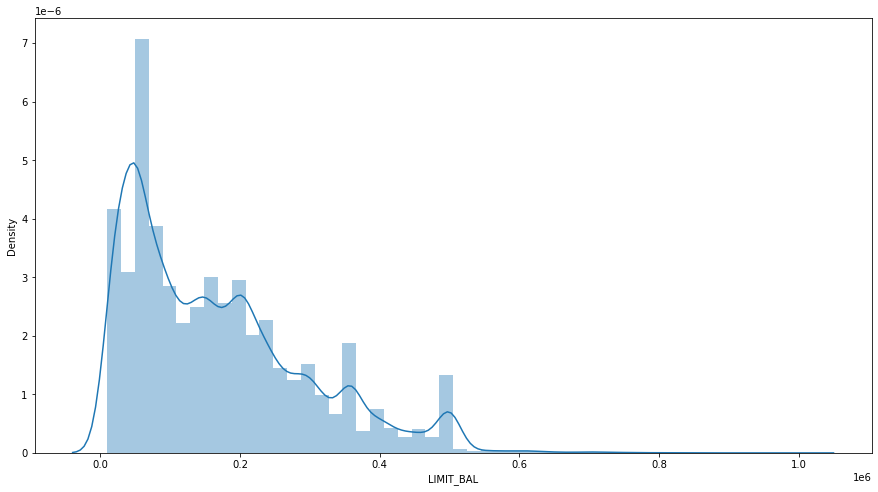

In [189]:
plt.figure(figsize=(15,8))
sns.distplot(df["LIMIT_BAL"])
plt.savefig('income.png', facecolor='w', bbox_inches='tight')
plt.show()

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


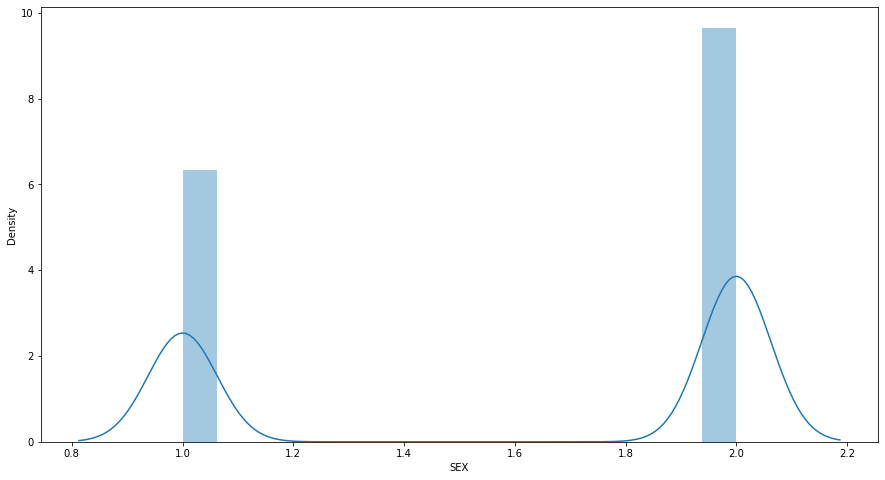

In [190]:
plt.figure(figsize=(15,8))
sns.distplot(df["SEX"])
plt.show()

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


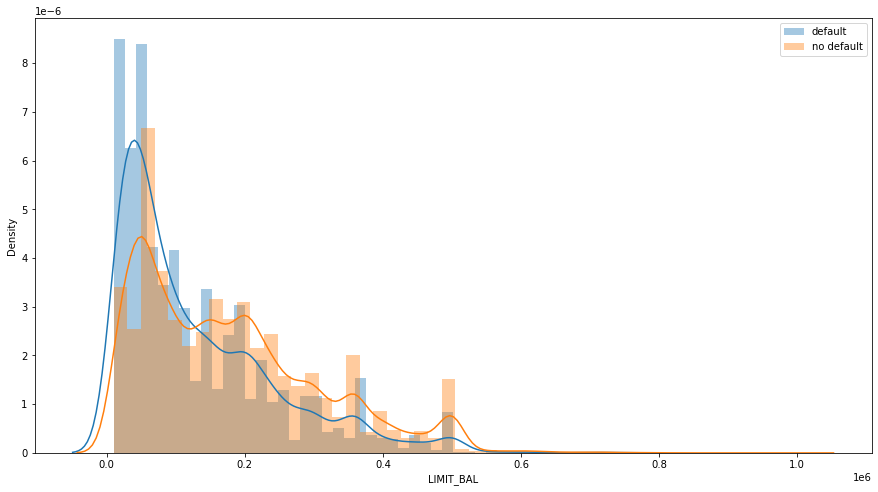

In [191]:
plt.figure(figsize=(15,8))
sns.distplot(df[df["default"]==1]["LIMIT_BAL"], label='default')
sns.distplot(df[df["default"]==0]["LIMIT_BAL"], label='no default')
plt.legend()
plt.show()

In [15]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [16]:
df["SEX"].unique()

array([2, 1], dtype=int64)

In [17]:
# Education has only 4 categorical levels, removing columns with higher values
df = df[df["EDUCATION"]<=4]

In [19]:
pay_cols = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

categorical_columns = ["SEX", "EDUCATION", "MARRIAGE"] + pay_cols
continuous_columns = [c for c in df.columns if c not in categorical_columns + ["default"]]
target_col = "default"

In [223]:
# male=1, female=2 => male=1, female=0
df["feature_SEX"] = (df["SEX"] == 1)

# Education encoding
edu_encoder = OneHotEncoder()
df[["edu_0", "edu_1", "edu_2", "edu_3", "edu_4"]] = edu_encoder.fit_transform(df["EDUCATION"].values.reshape(-1, 1)).toarray()

# encoding the columns having categorical values for pyment due
enc = OneHotEncoder()
enc.fit(df[pay_cols[0]].values.reshape(-1, 1))

for col in pay_cols:
    df[[f"PAY_{col[-1]}_{ix}" for ix in range(-2, 9)]] = enc.transform(df[col].values.reshape(-1, 1)).toarray()

# Encoding marrige column

marrige_encoder = OneHotEncoder()
df[["marriage_0", "marriage_1", "marriage_2", "marriage_3"]] = marrige_encoder.fit_transform(df["MARRIAGE"].values.reshape(-1, 1)).toarray()

C:\Users\surajp\AppData\Local\Temp/ipykernel_15576/2564031733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["feature_SEX"] = (df["SEX"] == 1)
C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [224]:
feature_names = [f for f in df.columns if f not in categorical_columns+["default"]]

In [225]:
feature_names

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'feature_SEX',
 'edu_0',
 'edu_1',
 'edu_2',
 'edu_3',
 'edu_4',
 'PAY_0_-2',
 'PAY_0_-1',
 'PAY_0_0',
 'PAY_0_1',
 'PAY_0_2',
 'PAY_0_3',
 'PAY_0_4',
 'PAY_0_5',
 'PAY_0_6',
 'PAY_0_7',
 'PAY_0_8',
 'PAY_2_-2',
 'PAY_2_-1',
 'PAY_2_0',
 'PAY_2_1',
 'PAY_2_2',
 'PAY_2_3',
 'PAY_2_4',
 'PAY_2_5',
 'PAY_2_6',
 'PAY_2_7',
 'PAY_2_8',
 'PAY_3_-2',
 'PAY_3_-1',
 'PAY_3_0',
 'PAY_3_1',
 'PAY_3_2',
 'PAY_3_3',
 'PAY_3_4',
 'PAY_3_5',
 'PAY_3_6',
 'PAY_3_7',
 'PAY_3_8',
 'PAY_4_-2',
 'PAY_4_-1',
 'PAY_4_0',
 'PAY_4_1',
 'PAY_4_2',
 'PAY_4_3',
 'PAY_4_4',
 'PAY_4_5',
 'PAY_4_6',
 'PAY_4_7',
 'PAY_4_8',
 'PAY_5_-2',
 'PAY_5_-1',
 'PAY_5_0',
 'PAY_5_1',
 'PAY_5_2',
 'PAY_5_3',
 'PAY_5_4',
 'PAY_5_5',
 'PAY_5_6',
 'PAY_5_7',
 'PAY_5_8',
 'PAY_6_-2',
 'PAY_6_-1',
 'PAY_6_0',
 'PAY_6_1',
 'PAY_6_2',
 'PAY_6_3',
 'PAY_

In [226]:
X = df.drop(["default"], axis=1)[feature_names].astype(float)
y = df["default"].astype(float)

In [241]:
(df["default"]==1).mean()

0.22279146583976542

In [228]:
continuous_cols = [c for c in feature_names if "AMT"]

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()
X_train[continuous_cols] = sc.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = sc.transform(X_test[continuous_cols])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


((23735, 94), (5934, 94), (23735,), (5934,))

In [230]:
X_train

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_7,PAY_6_8,marrige_0,marrige_1,marrige_2,marrige_3,marriage_0,marriage_1,marriage_2,marriage_3
ID,,,,,,,,,,,,,,,,,,,,,
16667,-0.906824,0.385504,-0.689839,-0.689937,0.021965,0.084159,0.132520,0.167541,-0.335382,1.838029,...,-0.040045,-0.00918,-0.043096,-0.911581,0.935230,-0.104831,-0.043096,-0.911581,0.935230,-0.104831
20887,0.860100,1.254115,2.422735,2.598409,2.017746,2.145915,-0.321526,-0.393158,0.849688,0.089179,...,-0.040045,-0.00918,-0.043096,-0.911581,0.935230,-0.104831,-0.043096,-0.911581,0.935230,-0.104831
21021,1.474683,0.276928,-0.525583,-0.489527,-0.116981,-0.590179,-0.582874,-0.542363,0.492636,1.406047,...,-0.040045,-0.00918,-0.043096,-0.911581,0.935230,-0.104831,-0.043096,-0.911581,0.935230,-0.104831
8959,1.321037,0.928386,0.435655,0.514852,0.393370,0.253742,1.907623,1.194790,0.837200,-0.039555,...,-0.040045,-0.00918,-0.043096,-0.911581,0.935230,-0.104831,-0.043096,-0.911581,0.935230,-0.104831
7563,-0.369065,-0.917412,-0.201474,-0.167299,-0.199796,-0.189009,-0.282404,-0.322429,-0.159495,-0.168159,...,-0.040045,-0.00918,-0.043096,-0.911581,0.935230,-0.104831,-0.043096,-0.911581,0.935230,-0.104831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17302,-0.906824,0.602657,-0.044325,-0.020974,0.004749,0.020376,-0.208010,-0.186290,-0.218124,-0.176004,...,-0.040045,-0.00918,-0.043096,1.096995,-1.069256,-0.104831,-0.043096,1.096995,-1.069256,-0.104831
19528,-1.060470,-0.048801,-0.258821,-0.260454,-0.281180,-0.329868,-0.347535,-0.603590,-0.229850,-0.194394,...,-0.040045,-0.00918,-0.043096,1.096995,-1.069256,-0.104831,-0.043096,1.096995,-1.069256,-0.104831
11636,-0.061773,-0.917412,-0.660037,-0.617216,-0.621838,-0.617796,-0.590969,-0.600562,-0.040478,-0.094340,...,-0.040045,-0.00918,-0.043096,-0.911581,0.935230,-0.104831,-0.043096,-0.911581,0.935230,-0.104831


In [231]:
model = models.Sequential()
model.add(L.Dense(32, input_dim = (len(feature_names)), activation="relu"))
model.add(L.Dense(1, activation="sigmoid"))

In [232]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                3040      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 33        
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [233]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [234]:
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
742/742 [==============================] - 2s 3ms/step - loss: 0.4623 - accuracy: 0.8107 - val_loss: 0.4454 - val_accuracy: 0.8133
Epoch 2/100
742/742 [==============================] - 2s 3ms/step - loss: 0.4355 - accuracy: 0.8206 - val_loss: 0.4438 - val_accuracy: 0.8116
Epoch 3/100
742/742 [==============================] - 2s 3ms/step - loss: 0.4312 - accuracy: 0.8214 - val_loss: 0.4420 - val_accuracy: 0.8124
Epoch 4/100
742/742 [==============================] - 2s 3ms/step - loss: 0.4282 - accuracy: 0.8225 - val_loss: 0.4406 - val_accuracy: 0.8151
Epoch 5/100
742/742 [==============================] - 2s 3ms/step - loss: 0.4270 - accuracy: 0.8237 - val_loss: 0.4408 - val_accuracy: 0.8141
Epoch 6/100
742/742 [==============================] - 2s 3ms/step - loss: 0.4252 - accuracy: 0.8244 - val_loss: 0.4405 - val_accuracy: 0.8140
Epoch 7/100
742/742 [==============================] - 2s 3ms/step - loss: 0.4244 - accuracy: 0.8244 - val_loss: 0.4422 - val_accuracy: 0.8131

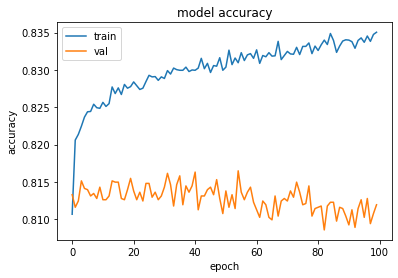

In [235]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

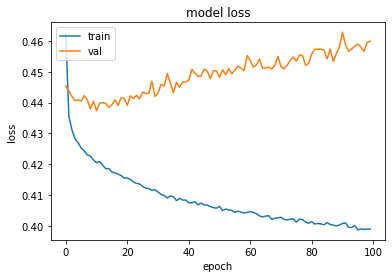

In [236]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [237]:
test_preds = model.predict(X_test)
test_preds = (test_preds>=0.5).astype(int)

cm = metrics.confusion_matrix(y_test, test_preds, normalize="all")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

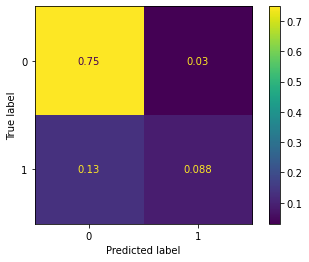

In [242]:
test_preds = model.predict(X_train)
test_preds = (test_preds>=0.5).astype(int)

cm = metrics.confusion_matrix(y_train, test_preds, normalize="all")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()